# Heat transfer
Consider a 2D heat transfer problem, assuming $\alpha=1$ to simplify the problem
$$\dfrac{\partial T}{\partial t}=\alpha(\dfrac{\partial^2 T}{\partial x^2}+\dfrac{\partial^2 T}{\partial y^2})$$
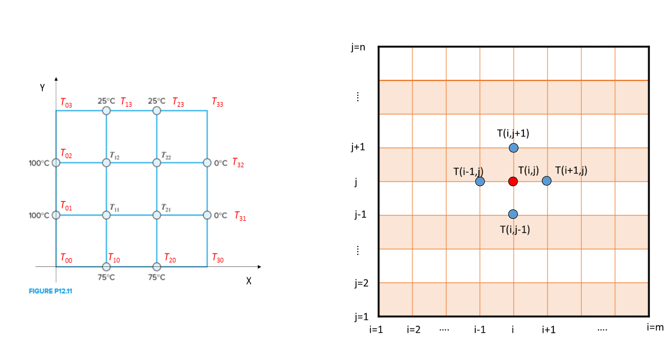
1. annotate the steady state code for each line of the code and explain what it is doing, name your code with annotations as `steady.m`
2. Study the slides provided in the pdf, and annotate the corresponding explicit time stepping code and explain what it is doing, name your code with annotation as `explicitExample.m`
3. conver it the `explicitExample.m` into a script `heatScript.m` and a function `heatExplcit.m`. The first few lines of `heatExplcit.m` is given below

```
function [T]=heatExplicit(Tl,Tr,Tt,Tb,n,eps,T0)
% Tl,Tr,Tt,Tb: temperature at left,right, top, bottom boundaries
% n: number of nodes in each dimension
% eps: relative iterative error
% T0: initial temperature guess for gauss-seidel solver
end
```

4. Bonus: if you have time, please consider solve the transient problem using implicit method, name your function as `heatImplicit.m`, call the function from `heatScript.m` The difference between implicit and explicit time stepping is shown in the slides.

# Submission

You should submit all the code into blackboard, including `steady.m, explicitExample.m, heatScript.m, heatExplicit.m` and optional `heatImplicit.m`

# Steady.m code


The gnuplot graphics toolkit is not actively maintained and has a number
of limitations that are ulikely to be fixed.  Communication with gnuplot
uses a one-directional pipe and limited information is passed back to the
Octave interpreter so most changes made interactively in the plot window
will not be reflected in the graphics properties managed by Octave.  For
example, if the plot window is closed with a mouse click, Octave will not
be notified and will not update it's internal list of open figure windows.
We recommend using the qt toolkit instead.



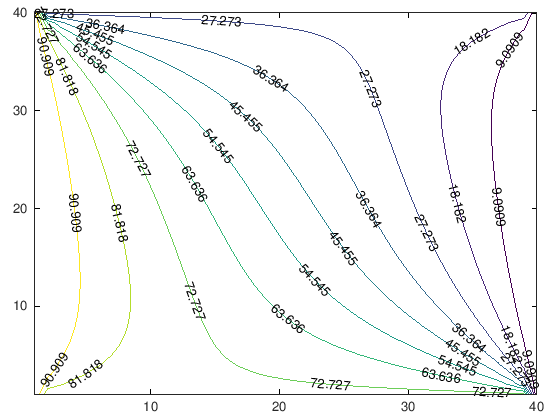

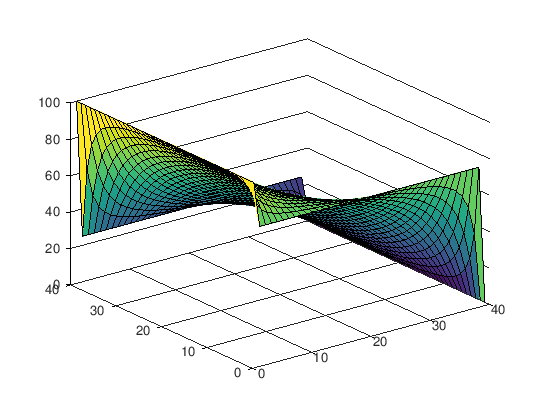

In [1]:
% This is the code for solving steady temperature
clear;clc;
n = 40; % number of points in x and y direction
T=zeros(n,n); % 
%% boundary conditions
T(1,:)=100; % left edge
T(n,:)=0; % right edge
T(:,1)=75; % bottom edge
T(:,n) = 25; % top edge

tol = 1e-6;
Told= T;
myerr = tol + 1;
it = 0; 
while (myerr > tol)
    Told = T;
    for i = 2:n-1 
        for j=2:n-1 
            T(i,j)=1/4*(T(i-1,j)+T(i+1,j)+T(i,j-1)+T(i,j+1));
        end
    end
    myerr=max(max(abs(T-Told))); 
    it = it+1;
end
figure;
surf(T) % plot the temperature
xlabel('x')
ylabel('y')
figure;
contour(T,'ShowText','on')
xlabel('x')
ylabel('y')


# explicitExample.m code

In [ ]:
% use double index to solve temperature
clear;clc;
L =1;
n = 40; % number of points in x and y direction
h = L/(n-1); 
T=zeros(n,n); % 
Tnext=zeros(n,n); % T at the next time step
%% boundary conditions
T(1,:)=100; % left edge
T(n,:)=0; % right edge
T(:,1)=75; % bottom edge
T(:,n) = 25; % top edge

tol = 1e-6;
Told= T;
myerr = tol + 1;
it = 0; 
alpha =1;
dt = 0.1*h^2/(2*alpha);
figure;
for ts = 1:1000
    Tnext(1,:)=100; % left edge
    Tnext(n,:)=0; % right edge
    Tnext(:,1)=75; % bottom edge
    Tnext(:,n) = 25; % top edge

    for i = 2:n-1 % x dir
        for j=2:n-1 %  y dir
            Tnext(i,j) = T(i,j)+alpha*dt/h^2*(T(i-1,j)+T(i+1,j)+T(i,j-1)+T(i,j+1)-4*T(i,j));
        end
    end
    T = Tnext;
    surf(T) % plot the temperature
    drawnow
end
figure;
surf(T) % plot the temperature
xlabel('x')
ylabel('y')
figure;
contour(T,'ShowText','on')
xlabel('x')
ylabel('y')
